In [14]:
import pandas as pd
from pycaret.classification import setup, compare_models,  create_model, tune_model, evaluate_model, save_model, load_model

In [15]:
#타이타닉 데이터 로드 및 전처리
data = pd.read_csv("car_data_result2.csv")
data.head()

,Unnamed: 0,가격,연식(년),주행거리(km),배기량(cc),차종,연료,변속기,압류_저당,색상_소분류,...,전동식 트렁크,스마트 크루즈 컨트롤,가죽 시트,전방 주차거리 경고,열선시트(1열/2열),후측방 경보 시스템,내비게이션,선루프,후방 모니터,옵션_갯수
0,0,44500000,2023,32070,1998,중형,가솔린,오토,0,흰색,...,1,1,1,1,1,1,1,1,1,41
1,1,163000000,2024,3973,4395,SUV,하이브리드,오토,0,파랑색,...,0,0,0,0,0,0,0,0,0,0
2,2,27900000,2024,17447,1999,SUV,LPG,오토,0,회색,...,0,0,1,0,1,1,1,1,1,13
3,3,43500000,2022,24784,1991,준중형,가솔린,오토,0,흰색,...,0,1,0,0,1,0,1,1,0,5
4,4,9900000,2022,34855,998,경차,가솔린,오토,0,진주색,...,0,0,1,0,1,1,1,0,1,30


In [16]:
from pycaret.regression import setup, compare_models, create_model, tune_model, predict_model

# PyCaret 설정
exp1 = setup(data, target='가격', ignore_features=["색상_소분류", "Unnamed: 0"], session_id=123)

# 가장 성능이 좋은 모델 비교
best_model = compare_models()

# 모델 학습
model = create_model(best_model)

# 모델 튜닝
tuned_model = tune_model(model)

# 모델 예측
predictions = predict_model(tuned_model)

# 결과 출력
predictions.head()


,Description,Value
0,Session id,123
1,Target,가격
2,Target type,Regression
3,Original data shape,"(1760, 23)"
4,Transformed data shape,"(1760, 52)"
5,Transformed train set shape,"(1232, 52)"
6,Transformed test set shape,"(528, 52)"
7,Ignore features,2
8,Numeric features,15
9,Categorical features,5


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,5394199.1413,320600981480607.0000,13424289.2932,0.7198,0.2014,0.1480,0.0870
lightgbm,Light Gradient Boosting Machine,6131668.5978,397464544392618.8125,15368774.1865,0.6389,0.2585,0.1776,0.1660
en,Elastic Net,10414353.5857,578767680157570.6250,19737693.9707,0.3673,0.4753,0.3492,0.0160
omp,Orthogonal Matching Pursuit,10744389.4840,583153250759163.7500,19894289.2700,0.3535,0.4804,0.3750,0.0130
huber,Huber Regressor,10458021.9981,613317241899546.5000,20304679.4499,0.3350,0.4447,0.3186,0.0180
ridge,Ridge Regression,10393272.9321,573813376834386.6250,20028115.1434,0.3126,0.5039,0.3679,0.1850
br,Bayesian Ridge,11241861.4079,611598184889895.2500,20754350.3462,0.2732,0.5896,0.3844,0.0150
knn,K Neighbors Regressor,11202072.9347,673022731246210.3750,21295030.3287,0.2597,0.4449,0.3962,0.0230
llar,Lasso Least Angle Regression,10456267.8288,605933538846178.2500,20882685.7462,0.1962,0.5284,0.3673,0.0170
lr,Linear Regression,10458374.7096,606040885000326.1250,20888001.3355,0.1958,0.5211,0.3673,0.3370


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4767107.3427,53065993783226.6328,7284640.9509,0.9134,0.1845,0.1545
1,4485363.3710,47903949057110.5625,6921267.8793,0.8184,0.1827,0.1337
2,5320227.5407,98025297569695.0781,9900772.5744,0.6009,0.2240,0.1636
3,4691219.2520,49299640332888.0312,7021370.2603,0.8013,0.2022,0.1489
4,4956328.4004,102400258414349.2656,10119301.2809,0.6594,0.2039,0.1504
5,3846990.3293,36947950965659.7656,6078482.6203,0.8449,0.1714,0.1330
6,4096647.2093,35942270732478.3359,5995187.2975,0.8560,0.1706,0.1316
7,9500696.8902,1319418617186027.2500,36323802.3503,0.6428,0.2133,0.1532
8,7514046.5650,1414095259517042.2500,37604457.9740,0.2545,0.2462,0.1347


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6058853.3790,116628667687330.4375,10799475.3432,0.8098,0.2508,0.2004
1,5102243.2702,62038286815907.4141,7876438.7140,0.7648,0.2077,0.1608
2,5120467.9695,76728060221165.1719,8759455.4752,0.6876,0.2180,0.1628
3,5301375.8293,65668158497082.2500,8103589.2355,0.7354,0.2219,0.1665
4,5613649.6423,123468249950175.2500,11111626.7913,0.5893,0.2843,0.2077
5,4942495.8557,72803394537282.8906,8532490.5237,0.6944,0.2566,0.1947
6,5088856.6321,114629951522103.0938,10706537.7934,0.5409,0.2077,0.1581
7,9781499.2764,2207191184631980.5000,46980753.3425,0.4024,0.2329,0.1600
8,7813464.5000,1209594307994088.0000,34779222.3604,0.3623,0.2692,0.1746


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,5732666.9848,360172976317394.6250,18978223.7398,-0.0164,0.2391,0.1763


,연식(년),주행거리(km),배기량(cc),차종,연료,변속기,압류_저당,색상_중분류,색상_대분류,통풍시트(1열/2열),...,가죽 시트,전방 주차거리 경고,열선시트(1열/2열),후측방 경보 시스템,내비게이션,선루프,후방 모니터,옵션_갯수,가격,prediction_label
1206,2018,77896,3342,대형차,가솔린,오토,0,기타,유채색,0,...,1,1,1,1,1,1,1,43,28700000,26324874.0
853,2020,41503,2497,승용,가솔린,오토,0,검정색,무채색,0,...,1,1,1,0,1,0,1,5,24700000,29404226.0
890,2020,62534,3342,승용,가솔린,오토,0,검정색,무채색,0,...,1,1,1,1,1,0,1,7,28300000,29104338.0
645,2020,70841,3470,승용,가솔린,오토,0,검정색,무채색,1,...,1,1,1,1,1,0,1,5,43900000,54740740.0
147,2023,25545,2497,대형,가솔린,오토,0,검정색,무채색,1,...,1,1,1,1,1,0,1,44,29800000,49167764.0


In [4]:
#환경설정
exp1 = setup(data,target = "가격",ignore_features=["색상_소분류","Unnamed: 0"])

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [6]:
best_models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,5318083.2739,344897497522503.1875,14649277.1648,0.7553,3.5697,303.5463,0.0270
lightgbm,Light Gradient Boosting Machine,6048518.8627,409199918238684.0625,15791636.9067,0.7351,3.7648,383.3014,0.1720
omp,Orthogonal Matching Pursuit,11349242.9603,629248358354883.5000,21014761.1615,0.5089,4.6659,1576.6176,0.0160
ridge,Ridge Regression,10995808.4817,614020314015023.2500,21005672.3771,0.4967,4.5525,1518.3894,0.0150
br,Bayesian Ridge,11036151.7294,628337465774479.8750,21222864.4761,0.4874,4.5495,1514.4473,0.0150
et,Extra Trees Regressor,5423175.3219,615014301724533.3750,19969625.9667,0.4487,1.7237,104.6602,0.0530
en,Elastic Net,12685884.5726,652107976006672.7500,21923739.2130,0.4475,4.7931,1888.1169,0.0150
gbr,Gradient Boosting Regressor,6556915.8342,419957739034855.1250,17123844.0460,0.4334,3.8396,396.3926,0.0330
llar,Lasso Least Angle Regression,11017791.3819,645326375052414.0000,21808499.8888,0.4280,4.5443,1512.2488,0.0160
lr,Linear Regression,11049198.4484,646309378870650.0000,21846985.6392,0.4258,4.5466,1519.7429,0.0150


In [9]:
# gbc 모델 훈련
xgb_model = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5191043.2263,160916518877883.7812,12685287.4969,0.8099,3.6772,336.2603
1,4762850.6564,76368246521477.8594,8738892.7515,0.8323,3.4327,279.1134
2,5182911.8668,96302037618753.4844,9813360.1594,0.7745,3.4898,261.0970
3,5008887.8925,74365705265374.4844,8623555.2567,0.8367,3.4047,247.6019
4,5248153.1083,217614405632088.8125,14751759.4080,0.5414,3.5394,266.2738
5,3751533.0783,38655321203855.6875,6217340.3642,0.9045,3.7539,357.0596
6,3538007.0198,27484228245261.4805,5242540.2474,0.9410,3.9469,336.6104
7,8749950.5676,1284743377375711.7500,35843317.0532,0.6760,3.0796,167.6230
8,7369272.0678,1426110300545344.7500,37763875.6028,0.3415,3.6216,277.2265


In [10]:
# 모델 평가
evaluate_model(xgb_model)

KeyError: None

In [11]:
# gbc 모델 하이퍼파라미터를 튜닝해보기
tune_model_gbc =tune_model(xgb_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6362194.5595,118945719841932.7969,10906223.9039,0.8595,4.1159,564.6540
1,5390221.9668,91913284040353.5781,9587141.5991,0.7981,3.6467,328.0567
2,5777620.2097,101032470899256.8281,10051490.9789,0.7635,3.6795,319.3801
3,5490011.3496,63085650839120.0156,7942647.5963,0.8614,3.6529,337.6946
4,5598053.7540,119816988313526.4844,10946094.6604,0.7475,3.9059,552.1824
5,5193630.7910,78199585935438.0625,8843052.9759,0.8067,4.0926,645.0900
6,5062902.2987,104870515023598.4531,10240630.5970,0.7750,4.1285,462.1464
7,9987837.9840,2292576454557875.5000,47880856.8695,0.4218,3.5277,415.5348
8,8192944.2721,1286455907562406.5000,35867198.2118,0.4060,4.0218,502.2147


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [12]:
print(tune_model_gbc.feature_names_in_)

['연식(년)' '주행거리(km)' '배기량(cc)' '차종_준중형차' '차종_대형' '차종_승용' '차종_SUV' '차종_경차'
 '차종_EV' '차종_대형차' '차종_RV' '차종_중형차' '차종_준중형' '차종_소형차' '차종_중형' '차종_소형'
 '차종_화물차' '차종_승합' '차종_승합차' '차종_스포츠카' '연료_가솔린' '연료_전기' '연료_LPG' '연료_디젤'
 '연료_하이브리드' '연료_기타' '변속기_오토' '변속기_CVT' '변속기_기타' '압류_저당' '색상_중분류_기타'
 '색상_중분류_파랑' '색상_중분류_흰색' '색상_중분류_회색' '색상_중분류_검정색' '색상_중분류_빨강' '색상_중분류_갈색'
 '색상_중분류_초록' '색상_중분류_노랑' '색상_대분류' '통풍시트(1열/2열)' '전동식 트렁크' '스마트 크루즈 컨트롤'
 '가죽 시트' '전방 주차거리 경고' '열선시트(1열/2열)' '후측방 경보 시스템' '내비게이션' '선루프' '후방 모니터'
 '옵션_갯수']


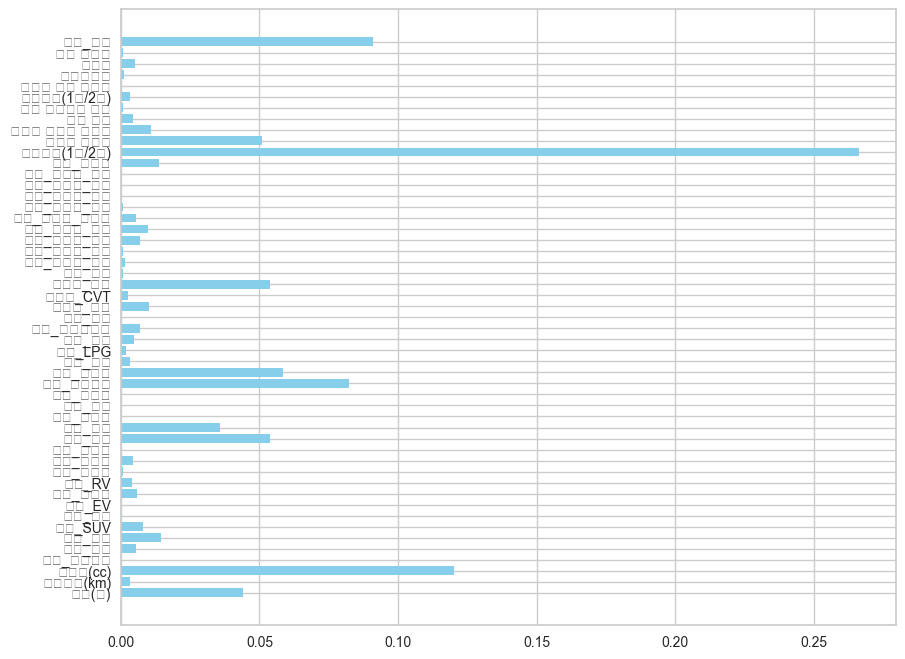

In [13]:
# 피쳐 중요도 그려보기
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.barh(tune_model_gbc.feature_names_in_, tune_model_gbc.feature_importances_, color='skyblue')
plt.show()